# El metodo del codo y el factor de la silueta del clustering

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score


In [3]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

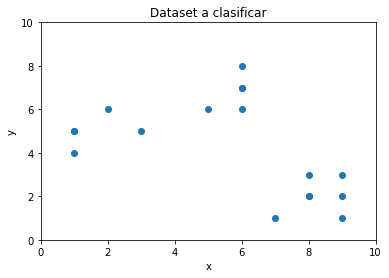

In [6]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

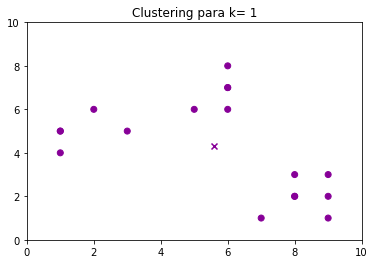

* Para k =  2  el promedio de la silueta es de : 0.6113424368705715
  -Para i = 1  la silueta del cluster vale:  0.49704450958269375
  -Para i = 2  la silueta del cluster vale:  0.7746251901389686


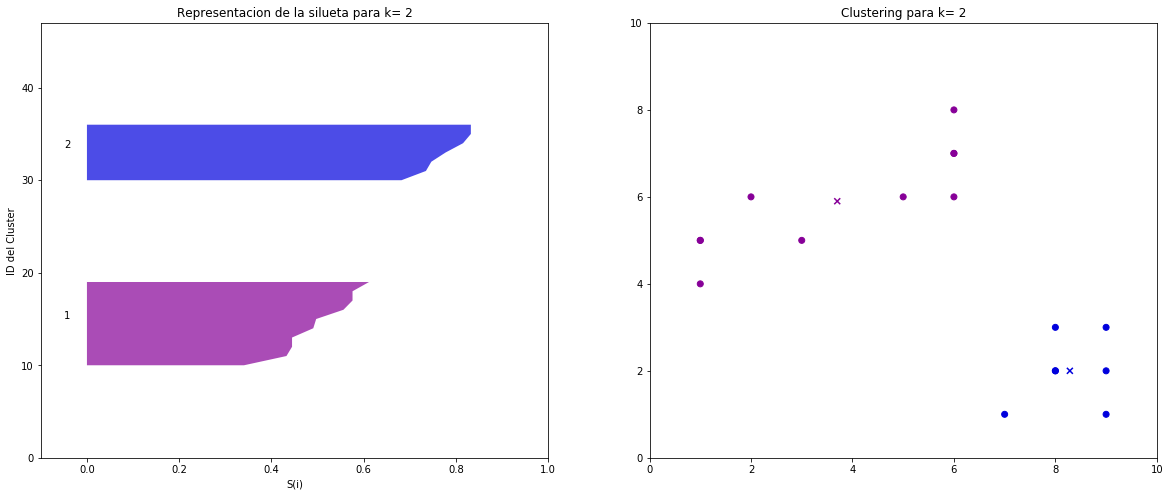

* Para k =  3  el promedio de la silueta es de : 0.7122079383287169
  -Para i = 1  la silueta del cluster vale:  0.7345257364682265
  -Para i = 2  la silueta del cluster vale:  0.6609508863896014
  -Para i = 3  la silueta del cluster vale:  0.7322200728725188


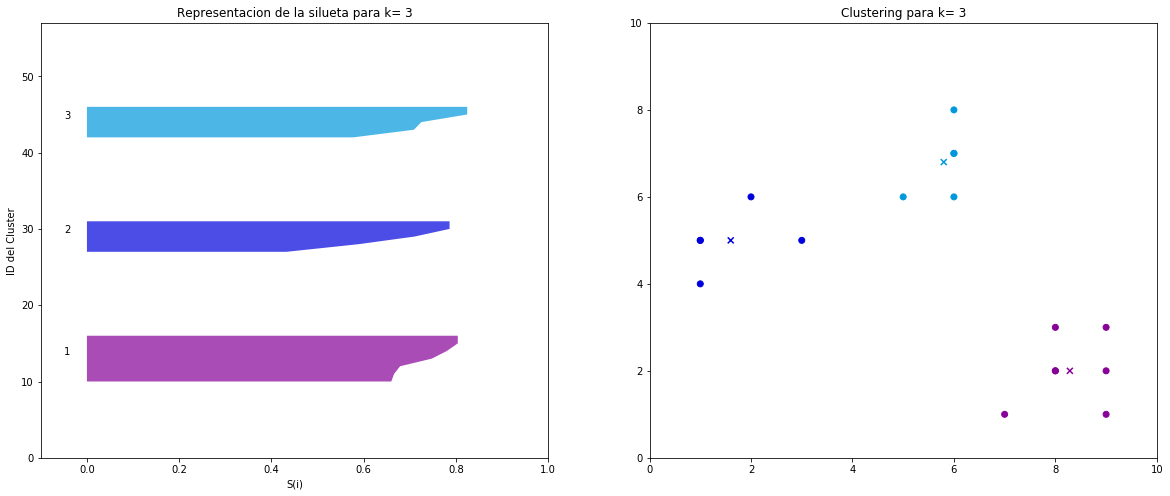

* Para k =  4  el promedio de la silueta es de : 0.6389948643127632
  -Para i = 1  la silueta del cluster vale:  0.7345257364682265
  -Para i = 2  la silueta del cluster vale:  0.24096929517637128
  -Para i = 3  la silueta del cluster vale:  0.654458796162702
  -Para i = 4  la silueta del cluster vale:  0.655666655624379


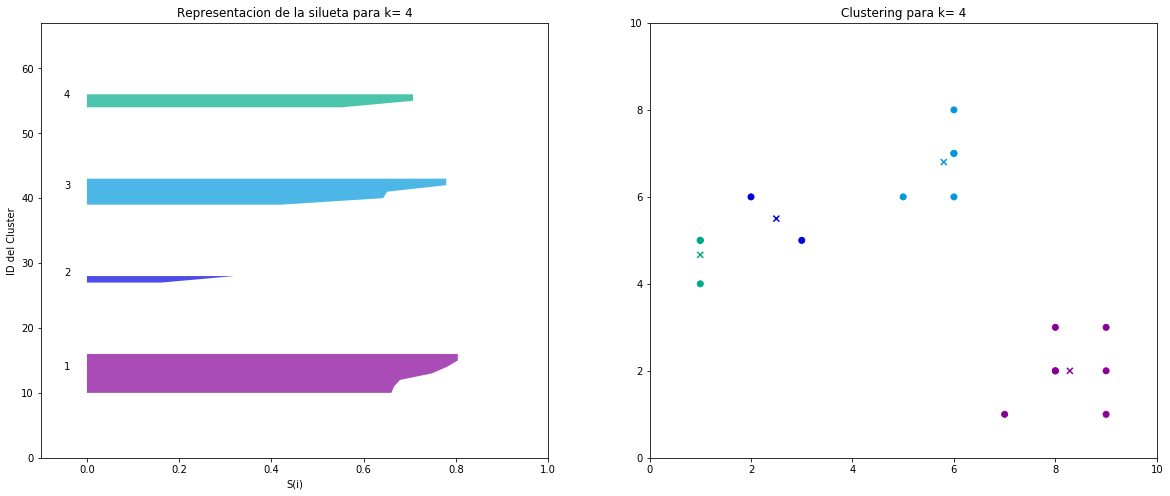

* Para k =  5  el promedio de la silueta es de : 0.46983374375750137
  -Para i = 1  la silueta del cluster vale:  0.37765685097302226
  -Para i = 2  la silueta del cluster vale:  0.24096929517637128
  -Para i = 3  la silueta del cluster vale:  0.654458796162702
  -Para i = 4  la silueta del cluster vale:  0.655666655624379
  -Para i = 5  la silueta del cluster vale:  0.0


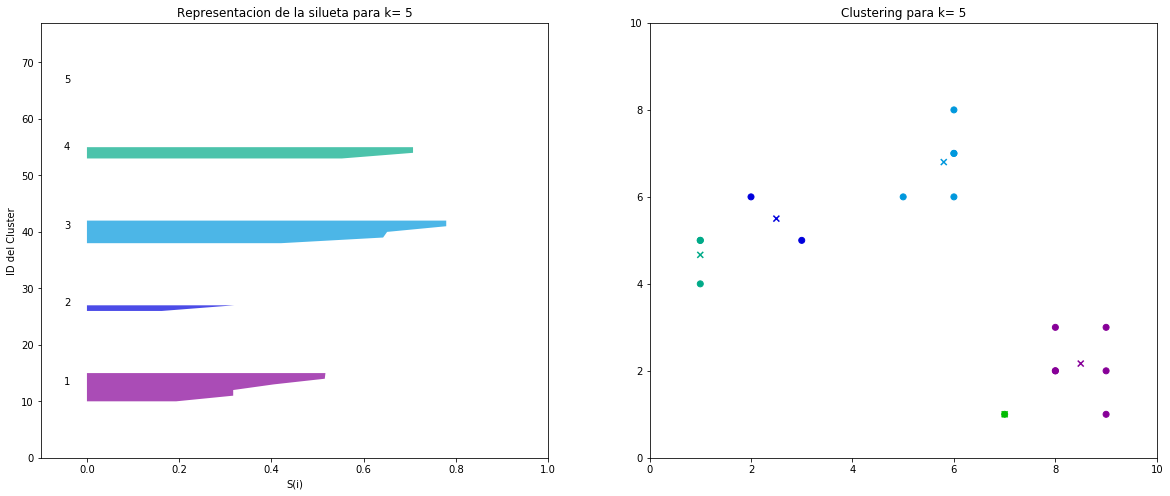

* Para k =  6  el promedio de la silueta es de : 0.4421681922609326
  -Para i = 1  la silueta del cluster vale:  0.263812295212263
  -Para i = 2  la silueta del cluster vale:  0.655666655624379
  -Para i = 3  la silueta del cluster vale:  0.654458796162702
  -Para i = 4  la silueta del cluster vale:  0.0
  -Para i = 5  la silueta del cluster vale:  0.31700053499298475
  -Para i = 6  la silueta del cluster vale:  0.24096929517637128


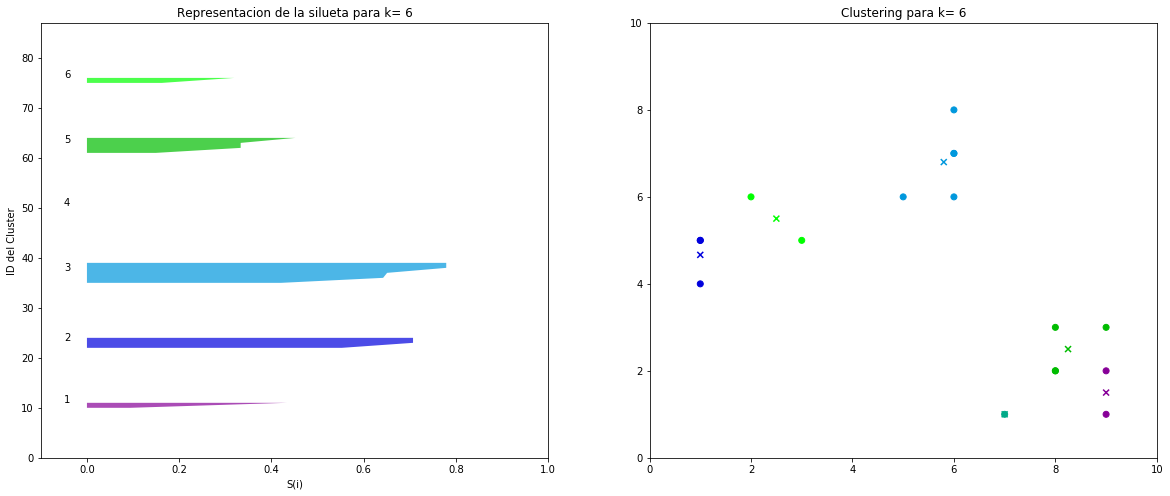

* Para k =  7  el promedio de la silueta es de : 0.3889390504750796
  -Para i = 1  la silueta del cluster vale:  0.30004208861569454
  -Para i = 2  la silueta del cluster vale:  0.24096929517637128
  -Para i = 3  la silueta del cluster vale:  0.32882042637679976
  -Para i = 4  la silueta del cluster vale:  0.655666655624379
  -Para i = 5  la silueta del cluster vale:  0.5664789734180768
  -Para i = 6  la silueta del cluster vale:  0.0
  -Para i = 7  la silueta del cluster vale:  0.3028895866899326


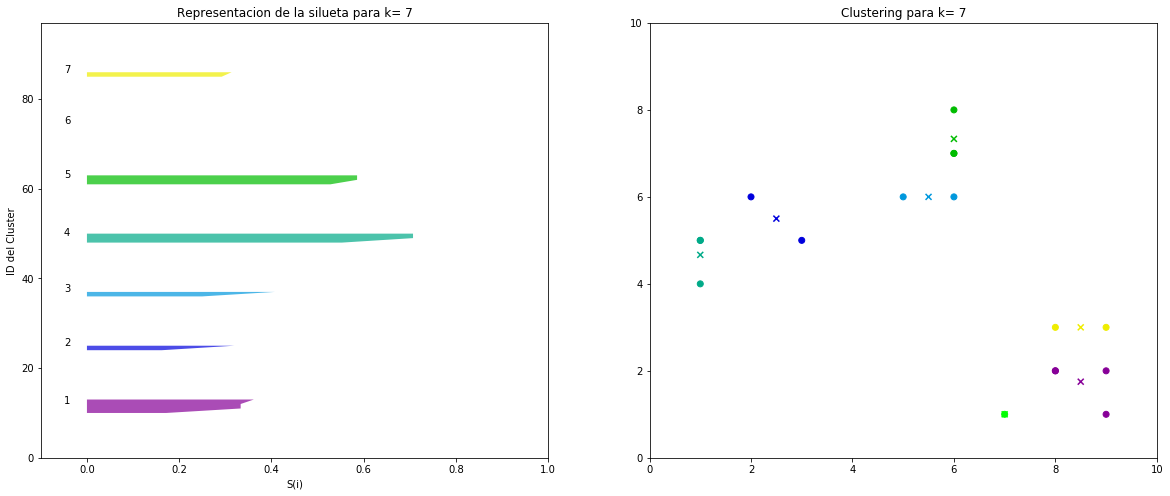

* Para k =  8  el promedio de la silueta es de : 0.3414551072677683
  -Para i = 1  la silueta del cluster vale:  0.3203958854461475
  -Para i = 2  la silueta del cluster vale:  0.0
  -Para i = 3  la silueta del cluster vale:  0.5664789734180768
  -Para i = 4  la silueta del cluster vale:  0.6152265411044983
  -Para i = 5  la silueta del cluster vale:  0.32882042637679976
  -Para i = 6  la silueta del cluster vale:  0.0
  -Para i = 7  la silueta del cluster vale:  0.0
  -Para i = 8  la silueta del cluster vale:  0.0


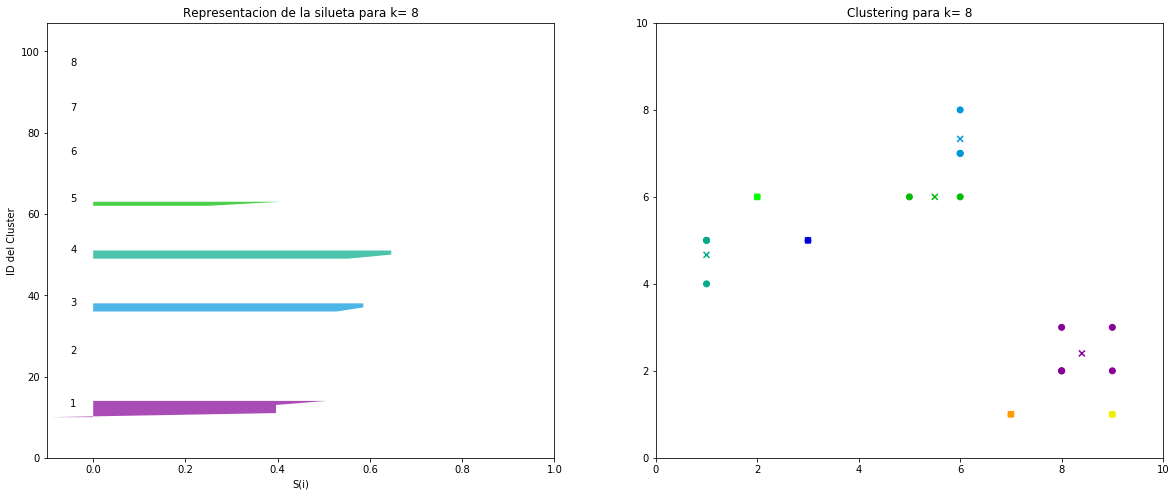

* Para k =  9  el promedio de la silueta es de : 0.39932610787930767
  -Para i = 1  la silueta del cluster vale:  0.14644660940672627
  -Para i = 2  la silueta del cluster vale:  0.0
  -Para i = 3  la silueta del cluster vale:  0.5664789734180768
  -Para i = 4  la silueta del cluster vale:  0.6152265411044983
  -Para i = 5  la silueta del cluster vale:  1.0
  -Para i = 6  la silueta del cluster vale:  0.0
  -Para i = 7  la silueta del cluster vale:  0.32882042637679976
  -Para i = 8  la silueta del cluster vale:  0.14644660940672627
  -Para i = 9  la silueta del cluster vale:  0.0


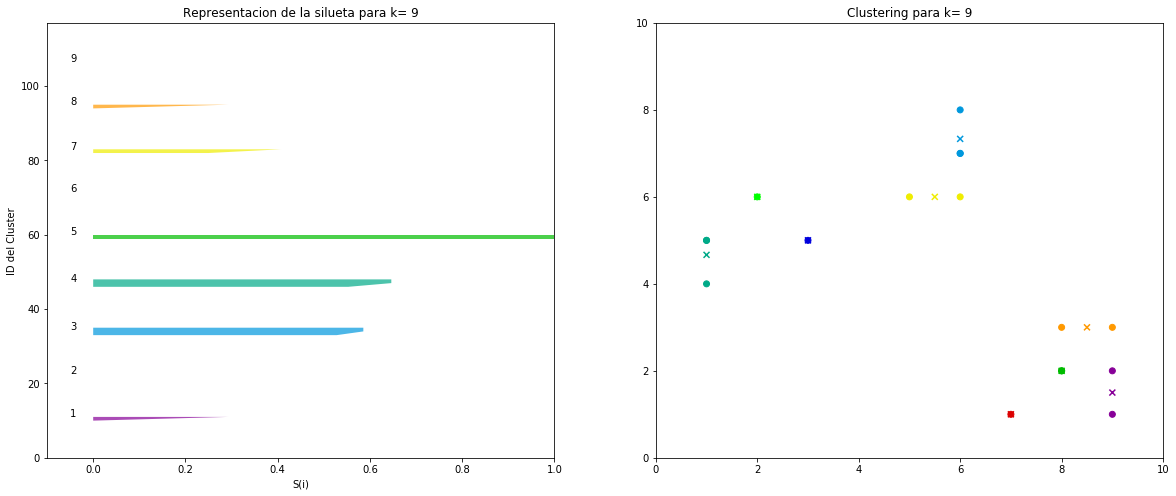

In [64]:
max_k = 10
K = range(1,max_k)
ssw = []
#color_palette = [plt.cm.spectral(float(i)/max_k) for i in K]
color_palette = [plt.cm.nipy_spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricamos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1< k < len(X):
        # Crear un subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        # El primer subplot contendra la silueta, que puede tener valores desde -1 a 1
        # En nuestro caso, ya encontramos que los valores estan entre -0.1 y 1
        axis1.set_xlim([-0.1,1.0])
        
        #El numero de clusters a insertar determinara el tamaño de cada barra
        #El coeficiente (n_clusters + 1) * 10 sera el espacio en blanco que dejamos
        # entre siluetas individuales de cada cluster para separarlas
        axis1.set_ylim([0, len(X) + (k + 1) * 10])
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ", k ," el promedio de la silueta es de : " + str(silhouette_avg))
        sample_sihouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-esimo
            ith_cluster_sv = sample_sihouette_values[labels == i]
            print("  -Para i =", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-esimo
            ith_cluster_sv.sort()
            
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-esimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            #Etiquetamos dicho cluster con el numero en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i + 1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del grafico
            y_lower = y_upper + 10 #dejamos vacias 10 posiciones sin muestra
            
        axis1.set_title("Representacion de la silueta para k= %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        #Fin de la representacion de la silueta
        
    ##Plot de los k-mean con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k= %s"%str(k))
    plt.scatter(x1,x2,c = label_color)
    #print(centers[0])
    plt.scatter(centers[0],centers[1], c=color_palette[:k], marker="x")
    plt.show()
            
        

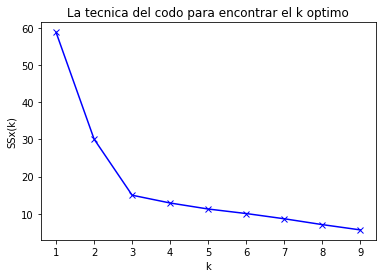

In [65]:
#Representacion del codo
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSx(k)")
plt.title("La tecnica del codo para encontrar el k optimo")
plt.show()


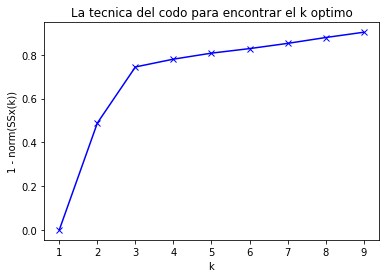

In [68]:
#Representacion del codo
plt.plot(K, 1 - ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1 - norm(SSx(k))")
plt.title("La tecnica del codo para encontrar el k optimo")
plt.show()